In [1]:
import yfinance as yf

In [2]:
msft = yf.Ticker('MSFT')
msft.info

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software - Infrastructure',
 'industryKey': 'software-infrastructure',
 'industryDisp': 'Software - Infrastructure',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': "Microsoft Corporation develops and supports software, services, devices, and solutions worldwide. The company's Productivity and Business Processes segment offers Microsoft 365 Commercial, Enterprise Mobility + Security, Windows Commercial, Power BI, Exchange, SharePoint, Microsoft Teams, Security and Compliance, and Copilot; Microsoft 365 Commercial products, such as Windows Commercial on-premises and Office licensed services; Microsoft 365 Consumer products and cloud services, such as Microsoft 365 Consumer subscriptions, Office licensed on-premises, and other consu

In [9]:
from datetime import datetime      
today_date = datetime.today().strftime('%Y-%m-%d')
print(today_date)
data = yf.download("MSFT", start="2022-01-01", end=today_date)
data

C:\Users\e3plfmen\AppData\Local\Temp\1\ipykernel_1616\1085551959.py:4: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed

2025-09-25


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2022-01-03,324.504608,327.655138,319.686719,325.086250,28865100
2022-01-04,318.940277,324.940827,316.138715,324.582127,32674300
2022-01-05,306.696869,316.090299,306.309117,315.886705,40054300
2022-01-06,304.273346,308.945831,301.956480,303.565678,39646100
2022-01-07,304.428467,306.813167,300.599349,304.535086,32720000
...,...,...,...,...,...
2025-09-18,508.450012,513.070007,507.660004,511.489990,18913700
2025-09-19,517.929993,519.299988,510.309998,510.559998,52474100


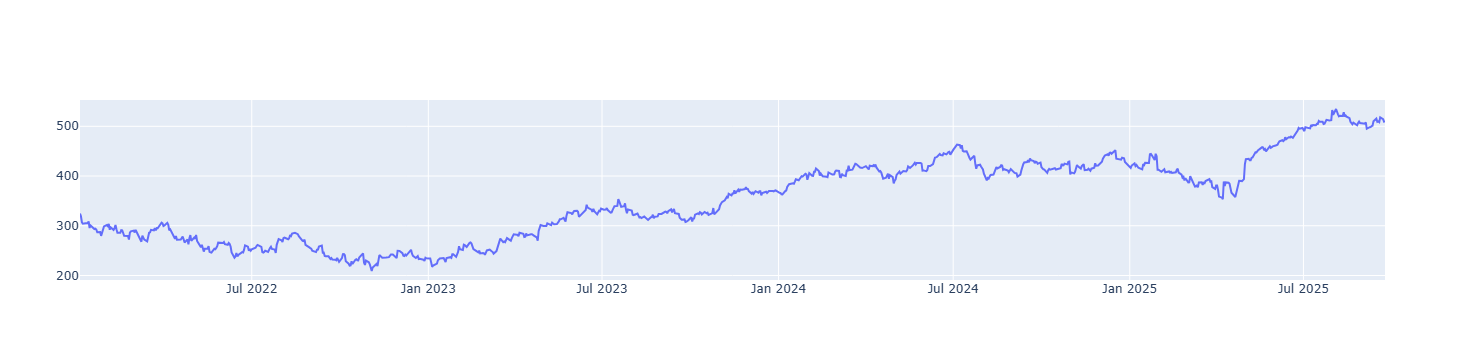

In [81]:
import plotly.graph_objects as go

x_data = data.index
y_data = data.Close['MSFT'].values

fig = go.Figure(data=go.Scatter(x=x_data, y=y_data, mode='lines'))
fig.show()

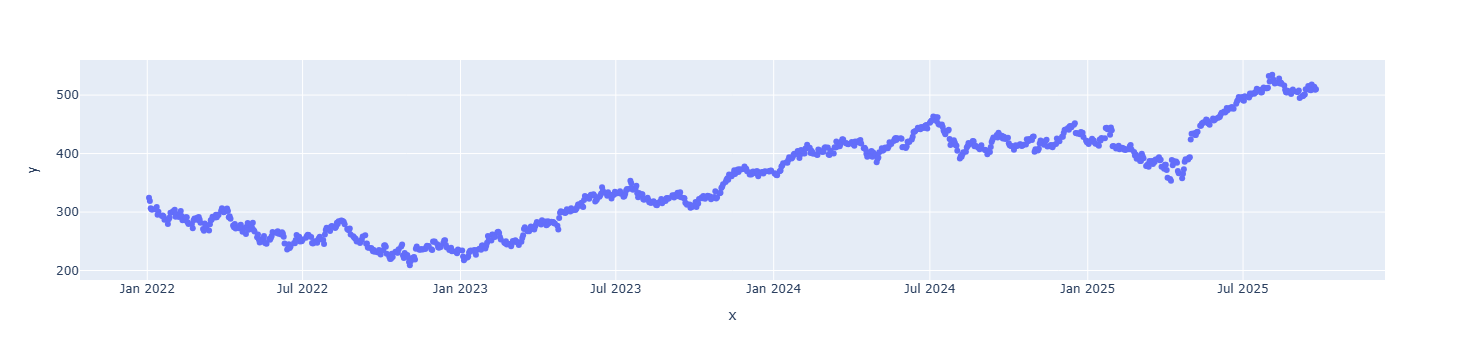

In [82]:
# alternative method to display graphs with plotly.express
import plotly.express as px
fig = px.scatter(x=data.index, y=data.Close.to_dict()['MSFT'].values())
fig.show()

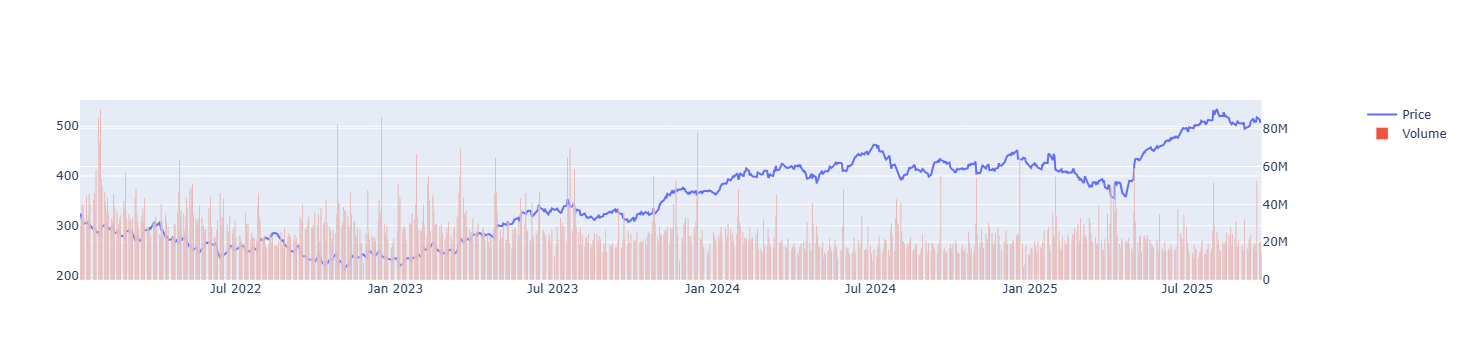

In [83]:
from plotly.subplots import make_subplots
fig2 = make_subplots(specs=[[{"secondary_y": True}]])
fig2.add_trace(go.Scatter(x=x_data, y=y_data, name='Price'), secondary_y=False)
fig2.add_trace(go.Bar(x=x_data, y=data['Volume']['MSFT'].values, name='Volume'), secondary_y=True)
fig2.show()

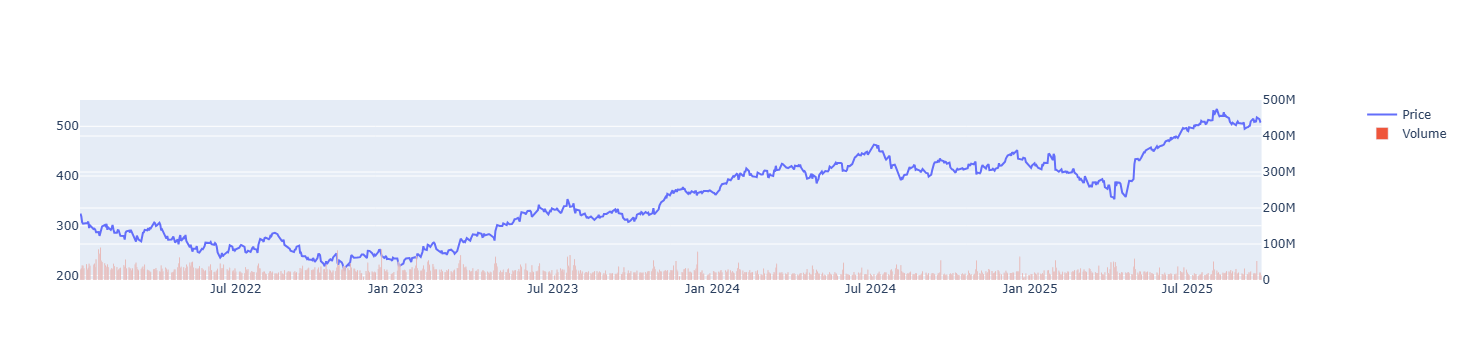

In [84]:
fig2.update_yaxes(range=[0,500000000],secondary_y=True)
fig2.update_yaxes(visible=True, secondary_y=True)
fig2

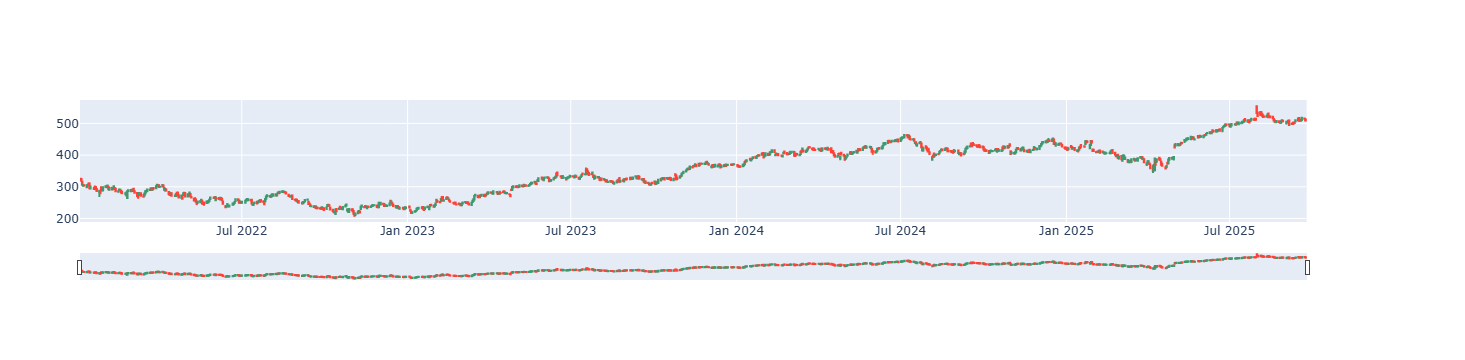

In [86]:
open_data = data['Open']['MSFT'].values
high_data = data['High']['MSFT'].values
low_data = data['Low']['MSFT'].values
close_data = data['Close']['MSFT'].values


fig3 = make_subplots(specs=[[{"secondary_y": True}]])
fig3.add_trace(go.Candlestick(x=data.index,               
                              open=open_data,                
                              high=high_data,                
                              low=low_data,                
                              close=close_data,                
                             ))
fig3